In [2]:
import numpy as np
import pandas as pd


In [3]:
data = pd.read_csv("./data/incidentProcess_custom.csv", sep='\t')
data

,Incident ID,Activity,ActivityTimeStamp,Asset Affected,Asset Type Affected,Asset SubType Affected,Service Affected,Status,Impact,Urgency,...,Reopen Time,Resolved Time,Close Time,Handle Time (Hours),Closure Code,Asset Caused,Asset Type Caused,Asset SubType Caused,Service Caused,Assignment Group
0,IM0000004,Assign to 2nd Line Operator,2013-01-07 08:17:17.000,SUB000508,subapplication,Web Based Application,SRVC000162,Closed,4,4,...,NaN,04/11/2013 13:50:27,04/11/2013 13:51:17,"3871,691111",Other,SUB000508,subapplication,Web Based Application,SRVC000162,TEAM0001
1,IM0000004,Assign to 1st Line Operator,2013-11-04 12:09:37.000,SUB000508,subapplication,Web Based Application,SRVC000162,Closed,4,4,...,NaN,04/11/2013 13:50:27,04/11/2013 13:51:17,"3871,691111",Other,SUB000508,subapplication,Web Based Application,SRVC000162,TEAM0003
2,IM0000004,Assign to 2nd Line Operator,2013-11-04 12:09:38.000,SUB000508,subapplication,Web Based Application,SRVC000162,Closed,4,4,...,NaN,04/11/2013 13:50:27,04/11/2013 13:51:17,"3871,691111",Other,SUB000508,subapplication,Web Based Application,SRVC000162,TEAM0003
3,IM0000004,Assign to 1st Line Operator,2013-11-04 13:41:30.000,SUB000508,subapplication,Web Based Application,SRVC000162,Closed,4,4,...,NaN,04/11/2013 13:50:27,04/11/2013 13:51:17,"3871,691111",Other,SUB000508,subapplication,Web Based Application,SRVC000162,TEAM0002
4,IM0000004,Assign to 2nd Line Operator,2013-11-04 13:41:31.000,SUB000508,subapplication,Web Based Application,SRVC000162,Closed,4,4,...,NaN,04/11/2013 13:50:27,04/11/2013 13:51:17,"3871,691111",Other,SUB000508,subapplication,Web Based Application,SRVC000162,TEAM0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303814,IM0047056,Set Asset Caused,2014-03-31 15:42:37.000,WBA000058,application,Web Based Application,SRVC000073,Closed,4,4,...,NaN,31/03/2014 15:42:34,31/03/2014 15:42:36,"0,116944444",Software,WBA000058,application,Web Based Application,SRVC000073,TEAM0191
303815,IM0047056,Close,2014-03-31 15:42:38.000,WBA000058,application,Web Based Application,SRVC000073,Closed,4,4,...,NaN,31/03/2014 15:42:34,31/03/2014 15:42:36,"0,116944444",Software,WBA000058,application,Web Based Application,SRVC000073,TEAM0191
303816,IM0047057,Open,2014-03-31 17:24:50.000,DCE000077,hardware,DataCenterEquipment,SRVC000267,Closed,3,3,...,NaN,31/03/2014 22:47:29,31/03/2014 22:47:32,"0,586388889",Hardware,DCE000077,hardware,DataCenterEquipment,SRVC000267,TEAM0199
303817,IM0047057,Assign to 1st Line Operator,2014-03-31 20:38:58.000,DCE000077,hardware,DataCenterEquipment,SRVC000267,Closed,3,3,...,NaN,31/03/2014 22:47:29,31/03/2014 22:47:32,"0,586388889",Hardware,DCE000077,hardware,DataCenterEquipment,SRVC000267,TEAM0134


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303819 entries, 0 to 303818
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Incident ID              303819 non-null  object 
 1   Activity                 303819 non-null  object 
 2   ActivityTimeStamp        303819 non-null  object 
 3   Asset Affected           303819 non-null  object 
 4   Asset Type Affected      303819 non-null  object 
 5   Asset SubType Affected   303819 non-null  object 
 6   Service Affected         303819 non-null  object 
 7   Status                   303819 non-null  object 
 8   Impact                   303819 non-null  int64  
 9   Urgency                  303819 non-null  int64  
 10  Priority                 303819 non-null  int64  
 11  Category                 303819 non-null  object 
 12  Number of Reassignments  303810 non-null  float64
 13  Open Time                303819 non-null  object 
 14  Reop

In [5]:
unique_cases = data.drop_duplicates('Incident ID')

In [6]:
unique_cases.head()

,Incident ID,Activity,ActivityTimeStamp,Asset Affected,Asset Type Affected,Asset SubType Affected,Service Affected,Status,Impact,Urgency,...,Reopen Time,Resolved Time,Close Time,Handle Time (Hours),Closure Code,Asset Caused,Asset Type Caused,Asset SubType Caused,Service Caused,Assignment Group
0,IM0000004,Assign to 2nd Line Operator,2013-01-07 08:17:17.000,SUB000508,subapplication,Web Based Application,SRVC000162,Closed,4,4,...,NaN,04/11/2013 13:50:27,04/11/2013 13:51:17,"3871,691111",Other,SUB000508,subapplication,Web Based Application,SRVC000162,TEAM0001
8,IM0000005,Assign to 2nd Line Operator,2013-01-07 08:17:54.000,WBA000124,application,Web Based Application,SRVC000088,Closed,3,3,...,02/12/2013 12:31:02,02/12/2013 12:36:21,02/12/2013 12:36:25,"4354,786389",Software,WBA000124,application,Web Based Application,SRVC000088,TEAM0001
26,IM0000006,Close,2014-01-13 15:13:13.000,DTA000024,application,Desktop Application,SRVC000092,Closed,3,3,...,NaN,13/01/2014 15:12:38,13/01/2014 15:13:11,"4843,119444",No error - works as designed,DTA000024,application,Desktop Application,SRVC000092,TEAM0170
28,IM0000011,Assign to 2nd Line Operator,2013-01-07 08:19:20.000,WBA000124,application,Web Based Application,SRVC000088,Closed,4,4,...,NaN,14/11/2013 09:31:09,14/11/2013 09:31:24,"43,21833333",Operator error,WBA000124,application,Web Based Application,SRVC000088,TEAM0001
46,IM0000012,Update from customer,2013-02-13 11:57:55.000,WBA000124,application,Web Based Application,SRVC000088,Closed,4,4,...,NaN,08/11/2013 13:55:49,08/11/2013 13:55:52,"3383,903333",Other,SUB000508,subapplication,Web Based Application,SRVC000162,TEAM0002


In [7]:
unique_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46601 entries, 0 to 303816
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Incident ID              46601 non-null  object 
 1   Activity                 46601 non-null  object 
 2   ActivityTimeStamp        46601 non-null  object 
 3   Asset Affected           46601 non-null  object 
 4   Asset Type Affected      46601 non-null  object 
 5   Asset SubType Affected   46601 non-null  object 
 6   Service Affected         46601 non-null  object 
 7   Status                   46601 non-null  object 
 8   Impact                   46601 non-null  int64  
 9   Urgency                  46601 non-null  int64  
 10  Priority                 46601 non-null  int64  
 11  Category                 46601 non-null  object 
 12  Number of Reassignments  46600 non-null  float64
 13  Open Time                46601 non-null  object 
 14  Reopen Time          

In [8]:
unique_cases.nunique()

Incident ID                46601
Activity                       6
ActivityTimeStamp          46356
Asset Affected              3019
Asset Type Affected           13
Asset SubType Affected        65
Service Affected             274
Status                         2
Impact                         5
Urgency                        5
Priority                       5
Category                       4
Number of Reassignments       41
Open Time                  46332
Reopen Time                 2282
Resolved Time              44599
Close Time                 46371
Handle Time (Hours)        31373
Closure Code                  15
Asset Caused                3651
Asset Type Caused             13
Asset SubType Caused          62
Service Caused               275
Assignment Group              56
dtype: int64

In [9]:
import matplotlib.pyplot as plt

In [10]:
unique_cases['Number of Reassignments'].mean()

1.1316094420600857

(array([3.4735e+04, 5.3760e+03, 2.1910e+03, 1.6050e+03, 7.2100e+02,
        6.2200e+02, 5.7400e+02, 1.7000e+02, 1.4600e+02, 1.0100e+02,
        5.8000e+01, 6.1000e+01, 4.7000e+01, 6.8000e+01, 2.7000e+01,
        1.4000e+01, 1.0000e+01, 7.0000e+00, 1.1000e+01, 1.0000e+01,
        8.0000e+00, 1.0000e+01, 7.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 4.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 0.  ,  1.15,  2.3 ,  3.45,  4.6 ,  5.75,  6.9 ,  8.05,  9.2 ,
        10.35, 11.5 , 12.65, 13.8 , 14.95, 16.1 , 17.25, 18.4 , 19.55,
        20.7 , 21.85, 23.  , 24.15, 25.3 , 26.45, 27.6 , 28.75, 29.9 ,
        31.05, 32.2 , 33.35, 34.5 , 35.65, 36.8 , 37.95, 39.1 , 40.25,
        41.4 , 42.55, 43.7 , 44.85, 46.  ]),
 <BarContainer object of 40 artists>)

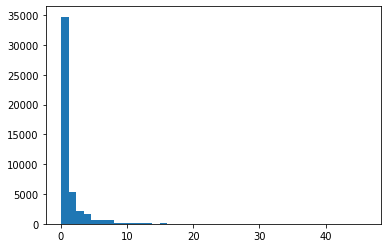

In [11]:
plt.hist(unique_cases['Number of Reassignments'], bins=40)

In [12]:
print(data['Incident ID'].nunique())
print(data['Incident ID'].shape)

46601
(303819,)


In [13]:
unique_cases['Asset Type Affected'].value_counts()

application             0.705886
subapplication          0.166992
computer                0.078174
storage                 0.015086
hardware                0.009485
software                0.007146
database                0.004592
displaydevice           0.004549
officeelectronics       0.003262
#N/B                    0.002382
networkcomponents       0.002296
applicationcomponent    0.000107
Phone                   0.000043
Name: Asset Type Affected, dtype: float64

In [14]:
for val in unique_cases['Asset Type Affected'].value_counts():
    print(val / 46616)

0.7056590012013043
0.1669383902522739
0.07814913334477433
0.015080659001201304
0.009481723013557576
0.007143470053200618
0.004590698472627424
0.004547794748584177
0.0032606830272867687
0.002381156684400206
0.002295349236313712
0.00010725931010811738
4.2903724043246954e-05


Text(0, 0.5, 'Incident count')

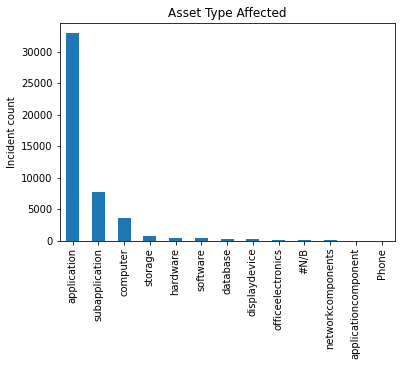

In [15]:
unique_cases['Asset Type Affected'].value_counts().plot(kind='bar')
plt.title("Asset Type Affected")
plt.ylabel("Incident count")
